In [39]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import numpy as np

In [50]:
df = pd.read_csv("TownData.csv")

In [51]:
df.head()

,Index,Town,Black or African American Alone,White Alone,Hispanic or Latino,Asian Alone,Two or More Races,Median Age,Percent Single-Parent Families,Median Home Value,...,Gini Ratio,Percent Public School Enrollment,Percent Private School Enrollment,Percent With Private Health Insurance,Percent With Public Health Insurance,Percent Without Health Insurance,Total Crime Index per 100.000,Total Violent Crime per 100.000,Total Property Crime per 100.000,Drug Arrests per 10.000
0,0,Andover,1.90,92.10,2.00,0.90,3.00,46.20,15.835,286800.0,...,0.337,95.25,4.75,87.45,22.55,2.95,531.975,35.162,496.800,3.133
1,1,Ansonia,10.55,63.65,21.50,2.30,2.00,41.45,37.800,217150.0,...,0.452,89.75,10.25,61.70,43.80,6.25,2047.500,147.800,1899.662,44.826
2,2,Ashford,0.80,93.70,3.60,0.40,1.55,40.65,18.045,251850.0,...,0.421,97.05,2.95,72.45,36.50,4.75,576.675,57.950,518.725,6.981
3,3,Avon,0.55,82.20,3.40,12.10,1.30,45.70,8.590,374200.0,...,0.477,85.50,14.50,90.10,22.30,1.45,989.312,16.500,972.800,9.309
4,4,Barkhamsted,0.10,95.80,1.25,1.75,0.75,46.80,16.030,257200.0,...,0.361,93.85,6.15,82.65,27.25,1.70,520.025,20.375,499.662,8.701


In [52]:
df.drop(['Index'], axis=1, inplace=True)
df.drop(["Town"], axis=1, inplace=True)

In [53]:
df["High Income Inequality"] = df["Gini Ratio"].apply(lambda x: 1 if x >= 0.5 else 0)

In [54]:
df.drop(["Gini Ratio"], axis=1, inplace=True)

In [55]:
df.head()

,Town,Black or African American Alone,White Alone,Hispanic or Latino,Asian Alone,Two or More Races,Median Age,Percent Single-Parent Families,Median Home Value,Median Household Income,Percent Public School Enrollment,Percent Private School Enrollment,Percent With Private Health Insurance,Percent With Public Health Insurance,Percent Without Health Insurance,Total Crime Index per 100.000,Total Violent Crime per 100.000,Total Property Crime per 100.000,Drug Arrests per 10.000,High Income Inequality
0,Andover,1.90,92.10,2.00,0.90,3.00,46.20,15.835,286800.0,99885.0,95.25,4.75,87.45,22.55,2.95,531.975,35.162,496.800,3.133,0
1,Ansonia,10.55,63.65,21.50,2.30,2.00,41.45,37.800,217150.0,48507.0,89.75,10.25,61.70,43.80,6.25,2047.500,147.800,1899.662,44.826,0
2,Ashford,0.80,93.70,3.60,0.40,1.55,40.65,18.045,251850.0,81389.5,97.05,2.95,72.45,36.50,4.75,576.675,57.950,518.725,6.981,0
3,Avon,0.55,82.20,3.40,12.10,1.30,45.70,8.590,374200.0,123485.5,85.50,14.50,90.10,22.30,1.45,989.312,16.500,972.800,9.309,0
4,Barkhamsted,0.10,95.80,1.25,1.75,0.75,46.80,16.030,257200.0,99617.5,93.85,6.15,82.65,27.25,1.70,520.025,20.375,499.662,8.701,0


In [56]:
sum(df["High Income Inequality"] == 1), sum(df["High Income Inequality"] == 0) 

(17, 153)

In [58]:
X = df.iloc[:, 0:-1]
y = df.iloc[:, -1]

In [62]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [63]:
X

array([[-0.29509504,  0.63052982, -0.68557974, ..., -0.40938456,
        -0.87807695, -0.76883857],
       [ 0.86516502, -1.22403733,  1.65547592, ...,  0.291698  ,
         0.79567588,  1.55389311],
       [-0.44264257,  0.73482886, -0.49349312, ..., -0.26754726,
        -0.85191826, -0.55446514],
       ...,
       [-0.23473469, -0.36031097, -0.43946876, ..., -0.40642806,
         0.06714118, -0.16337847],
       [-0.49629621,  0.53600883, -0.31341192, ..., -0.49161882,
        -0.88690588, -0.44254304],
       [-0.54994985,  0.7674223 , -0.40945522, ..., -0.38269515,
        -0.93131898, -0.68137332]])

In [64]:
model = LogisticRegression()
model.fit(X, y)

In [71]:
len(model.coef_.ravel())
len(df.iloc[:, 0:-1].columns)

18

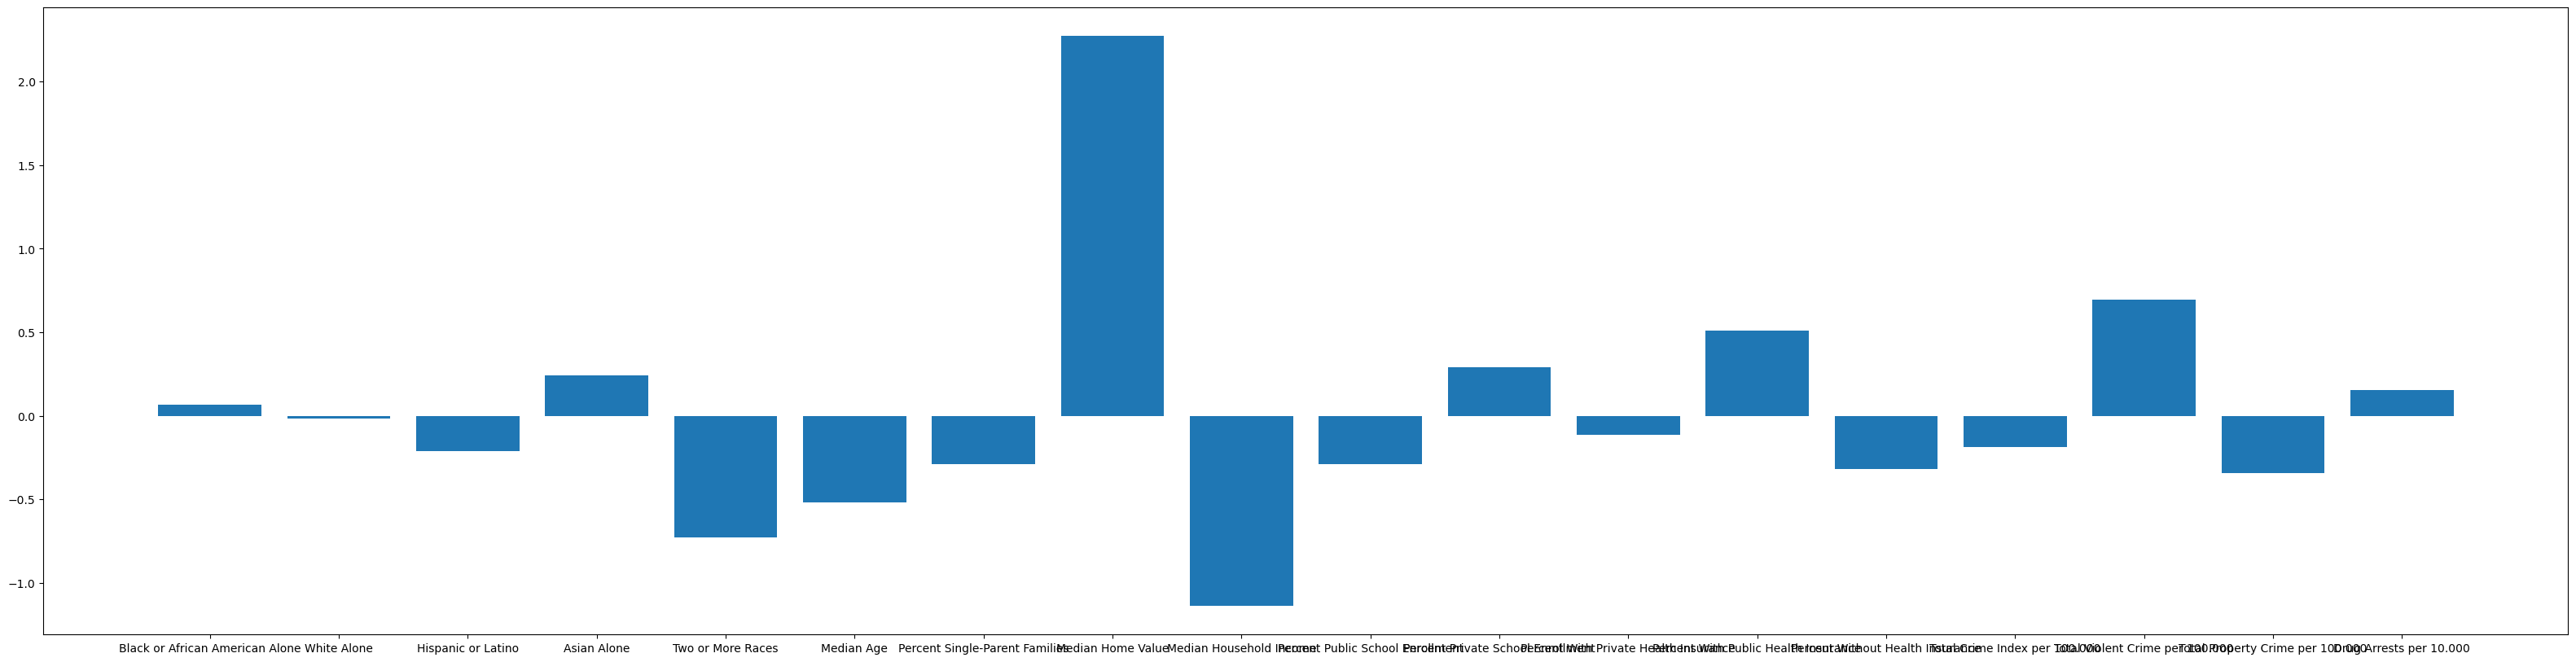

In [79]:
plt.figure(figsize=(40, 10))
plt.bar(df.iloc[:, 0:-1].columns, model.coef_.ravel())
plt.show()